In [1]:
import pandas as pd
import seaborn as sns

In [96]:
df=pd.read_csv("/root/Downloads/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


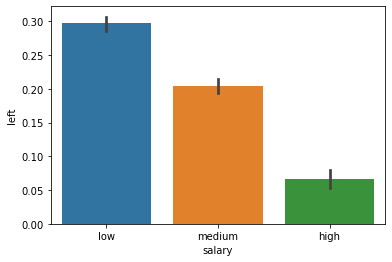

In [4]:
sns.barplot(x='salary',y='left',data=df)

In [6]:
df[['Department','left']]

,Department,left
0,sales,1
1,sales,1
2,sales,1
3,sales,1
4,sales,1
...,...,...
14994,support,1
14995,support,1
14996,support,1
14997,support,1


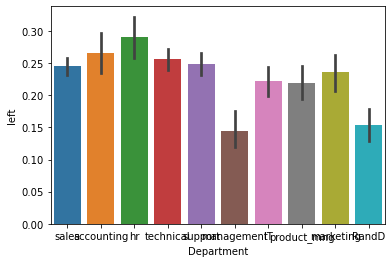

In [7]:
sns.barplot(x='Department',y='left',data=df)

In [9]:
df['Department'].uniqueque()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [18]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [97]:
df['salary']=df['salary'].map({'high':3,'medium':2,'low':1})

In [126]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.000000,0.105021,-0.142970,0.020048,-0.100866,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,-0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.013002
number_project,-0.142970,0.349333,1.000000,-0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.001803
average_montly_hours,0.020048,-0.339742,-0.417211,1.000000,-0.127755,0.010143,-0.071287,0.003544,0.002242
time_spend_company,-0.100866,0.131591,0.196786,-0.127755,1.000000,0.002120,0.144822,0.067433,0.048715
Work_accident,0.058697,-0.007104,-0.004741,0.010143,0.002120,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,-0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,0.003544,0.067433,0.039245,-0.061788,1.000000,0.098119
salary,0.050022,-0.013002,-0.001803,0.002242,0.048715,0.009247,-0.157898,0.098119,1.000000


In [64]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [93]:
df[['left','promotion_last_5years']].corr()

,left,promotion_last_5years
left,1.000000,-0.061788
promotion_last_5years,-0.061788,1.000000


In [12]:
import matplotlib.pyplot as plt

In [49]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [115]:
#x=df[['satisfaction_level','Work_accident','time_spend_company','salary','number_project','average_montly_hours']]
x=df.drop(['left','Department','last_evaluation'],axis=1)

In [114]:
df['average_montly_hours']=df['average_montly_hours'].apply(lambda x: (abs(x-df['average_montly_hours'].max())/(df['average_montly_hours'].max()-df['average_montly_hours'].min())))

In [116]:
y=df['left']

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error

In [118]:
x_train,x_val,y_train,y_val=train_test_split(x,y)

In [119]:
len(x_train),len(y_train)

(11249, 11249)

In [120]:
modal=LogisticRegression()

In [121]:
modal.fit(x_train,y_train)

LogisticRegression()

In [122]:
pre=modal.predict(x_val)
pre

array([1, 0, 0, ..., 0, 0, 0])

In [123]:
err=mean_absolute_error(y_val,pre)

In [124]:
err

0.19813333333333333

In [125]:
modal.score(x_val,y_val)

0.8018666666666666

In [111]:
for x in range(len(pre)):
    print(f'{pre[x]} -> {y_val.iloc[x]}')

0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 1
0 -> 0
1 -> 1
1 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 0
0 -> 1
1 -> 0
1 -> 1
1 -> 1
0 -> 0
1 -> 0
0 -> 1
1 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
1 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
1 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0

0 -> 0
1 -> 0
0 -> 0
0 -> 0
1 -> 1
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 1
0 -> 0
1 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
1 -> 1
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 1
1 -> 1
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 1
1 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0

0 -> 0
0 -> 1
1 -> 1
0 -> 0
1 -> 1
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 1
1 -> 1
0 -> 0
0 -> 0
1 -> 0
0 -> 1
0 -> 1
0 -> 0
0 -> 1
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 1
1 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
1 -> 0
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
1 -> 1
1 -> 1
1 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 1
0 -> 1
0 -> 0
0 -> 0
0 -> 0
0 -> 1
0 -> 1
1 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
0 -> 0
1 -> 0
0 -> 0
0 -> 1
0 -> 0